In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data set

In [10]:
data_input = pd.read_csv("creditcard.csv")

In [3]:
data_input.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [6]:
data_input.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,88.349619,0.001727
std,47488.145955,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,250.120109,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,5.600000,0.000000
50%,84692.000000,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,22.000000,0.000000
75%,139320.500000,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,77.165000,0.000000
max,172792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25691.160000,1.000000


# Scaling the data using min-max scaling

In [5]:
print("\nScaling the data using min-max feature scaling...")
columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17",
           "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28"]
for col in columns:
    data_input[col] = (data_input[col] - data_input[col].min()) / (data_input[col].max() - data_input[col].min())


Scaling the data using min-max feature scaling...


# Calculating IQR of the whole data-set

In [ ]:
print("\nCalculating Inter Quantile Range...")
Q1 = data_input.quantile(0.25)
Q3 = data_input.quantile(0.75)
IQR = Q3 - Q1

# Outlier trimming based upon the IQR

In [8]:
print("\nOutlier trimming based upon the IQR...")
data_input = data_input[~((data_input < (Q1 - 1.5 * IQR)) | (data_input > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_input.shape)


Outlier trimming based upon the IQR...
(146319, 31)


{'whiskers': [<matplotlib.lines.Line2D at 0x116def91d90>,
 'caps': [<matplotlib.lines.Line2D at 0x116defa8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x116def91a30>],
 'medians': [<matplotlib.lines.Line2D at 0x116defa8b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x116defa8eb0>],
 'means': []}

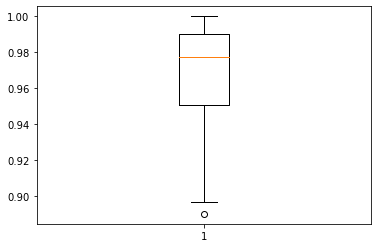

In [9]:
plt.boxplot(data_input["V1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x116df06fa00>,
 'caps': [<matplotlib.lines.Line2D at 0x116df07d100>,
 'boxes': [<matplotlib.lines.Line2D at 0x116df06f6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x116df07d7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x116df07db20>],
 'means': []}

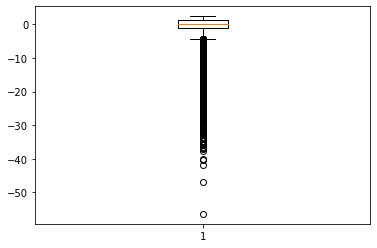

In [11]:
plt.boxplot(data_input["V1"])